# Predictive Analyis - Decision Tree Machine Learning
#### Benjamin Robin 7/13/2024
#### https://github.com/BenjaminRobin22/Robin_Capstone

#### 1. Import the data



In [2]:
import pandas as pd

# bringing in my final CSV file from the prior module
file_path = 'Final_Data_Set.csv'

#Load the data into a DataFrame
df= pd.read_csv(file_path)

# Trim spaces from column names
df.columns = df.columns.str.strip()

# Display the first few rows to verify the import
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,...,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,region,sub-region,Population,Measles_per_Million,HIV/AIDS_per_10Million
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,1154,19.1,...,0.1,17.2,17.3,0.479,10.1,Asia,Southern Asia,33753499,34.189048,0.029627
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,492,18.6,...,0.1,17.5,17.5,0.476,10.0,Asia,Southern Asia,32716210,15.038417,0.030566
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,430,18.1,...,0.1,17.7,17.7,0.470,9.9,Asia,Southern Asia,31541209,13.632959,0.031705
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,2787,17.6,...,0.1,17.9,18.0,0.463,9.8,Asia,Southern Asia,30466479,91.477588,0.032823
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,3013,17.2,...,0.1,18.2,18.2,0.454,9.5,Asia,Southern Asia,29249157,103.011516,0.034189


In [3]:
# Print all column names and the number of rows
print(f"Number of rows: {df.shape[0]}")
print("Column names:")
for column in df.columns:
    print(column)

Number of rows: 2928
Column names:
Country
Year
Status
Life expectancy
Adult Mortality
infant deaths
Alcohol
percentage expenditure
Measles
BMI
under-five deaths
Polio
Diphtheria
HIV/AIDS
thinness  1-19 years
thinness 5-9 years
Income composition of resources
Schooling
region
sub-region
Population
Measles_per_Million
HIV/AIDS_per_10Million


#### 2. Spliting the data set 80% Train and 20% Test

In [4]:
from sklearn.model_selection import train_test_split
# Select the features and the target variable
features = df[['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Measles', 'BMI', 'HIV/AIDS', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling', 'region', 'sub-region', 'Population', 'Measles_per_Million', 'HIV/AIDS_per_10Million']]
target = df['Life expectancy']

# Encode categorical variables (Country, Status) using one-hot encoding
df = pd.get_dummies(df, columns=['Country', 'Status'], drop_first=True)

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (2342, 19)
Testing features shape: (586, 19)
Training target shape: (2342,)
Testing target shape: (586,)


#### 3. Running Predictive Machine Learning Models

##### Initial Results without filters

Mean Squared Error: 6.60
R-squared: 0.92

Feature Importances:
                            Feature  Importance
9   Income composition of resources    0.701575
6                          HIV/AIDS    0.123126
0                   Adult Mortality    0.101855
10                        Schooling    0.011457
5                               BMI    0.010548
2                           Alcohol    0.010287
1                     infant deaths    0.009558
13           HIV/AIDS_per_10Million    0.007307
8                thinness 5-9 years    0.006701
7              thinness  1-19 years    0.006236
11                       Population    0.004616
4                           Measles    0.003144
12              Measles_per_Million    0.001838
3            percentage expenditure    0.001753


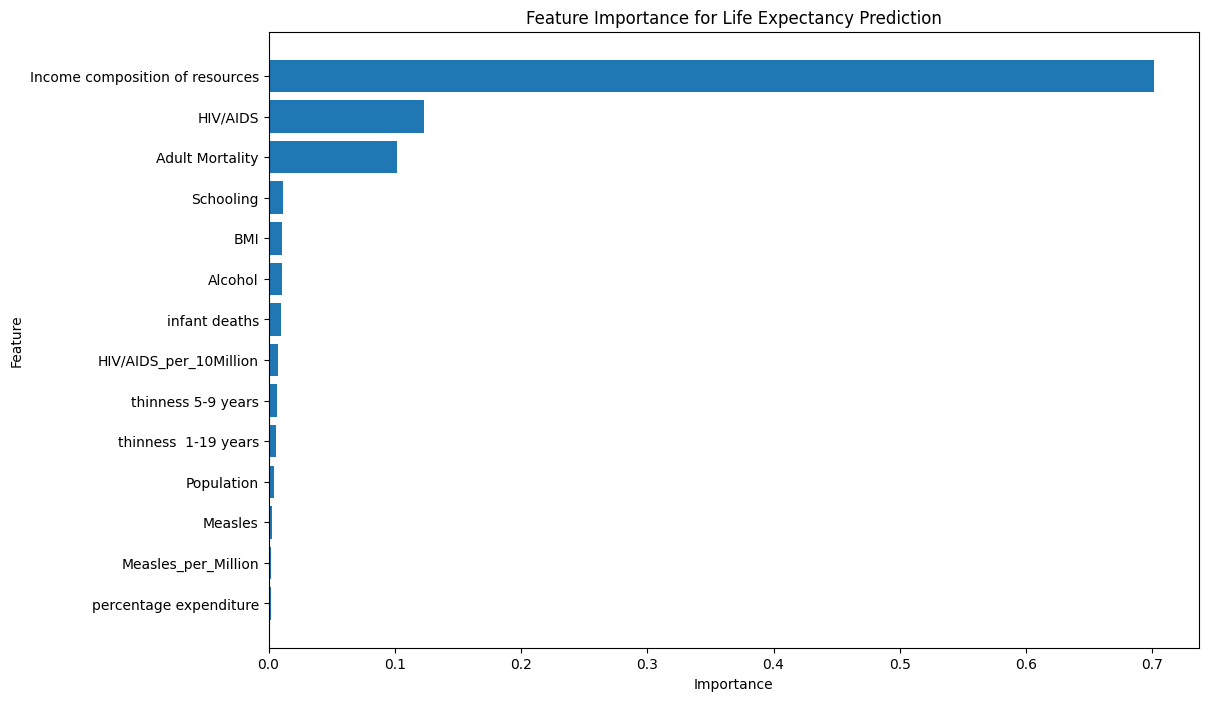

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the CSV file and preprocess the data
file_path = 'Final_Data_Set.csv'
df = pd.read_csv(file_path)

# Trim spaces from column names
df.columns = df.columns.str.strip()

# Define features and target variable
features = ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 
            'Measles', 'BMI', 'HIV/AIDS', 'thinness  1-19 years', 'thinness 5-9 years', 
            'Income composition of resources', 'Schooling', 'Population', 
            'Measles_per_Million', 'HIV/AIDS_per_10Million']
target = 'Life expectancy'

# Define X (features) and y (target)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = regressor.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Get feature importances
feature_importances = regressor.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("\nFeature Importances:")
print(feature_importances_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Life Expectancy Prediction')
plt.gca().invert_yaxis()
plt.show()



##### Breaking down the results by region

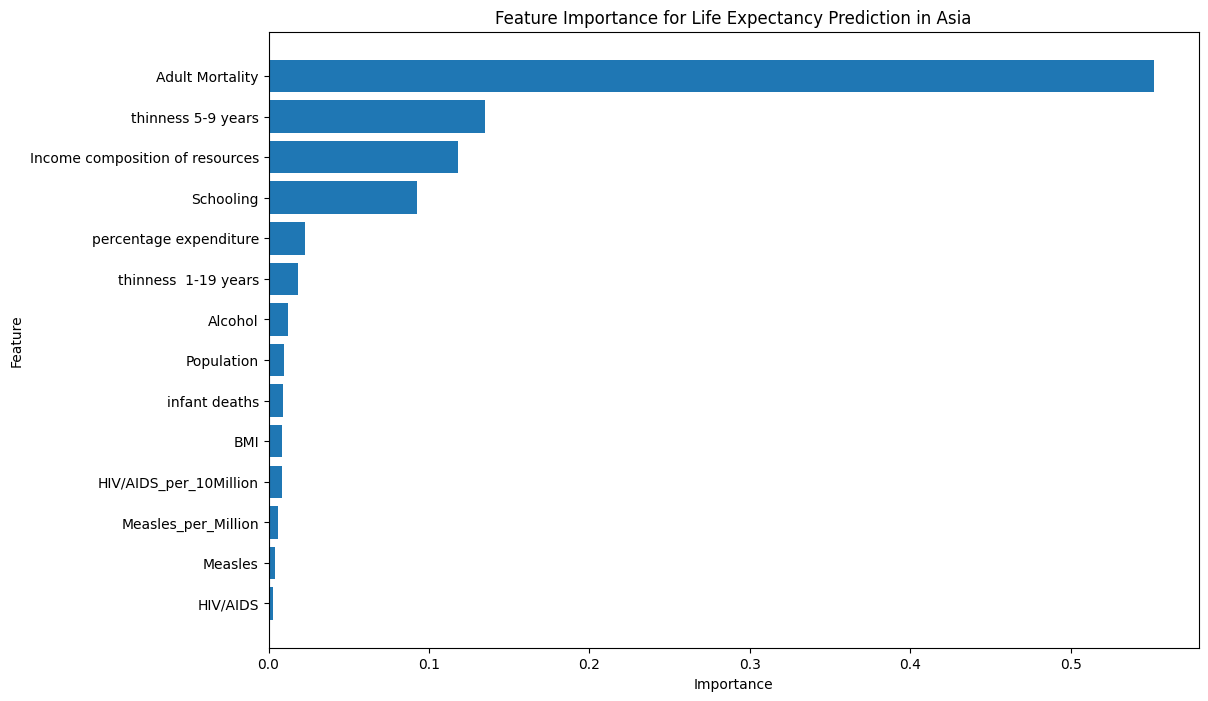

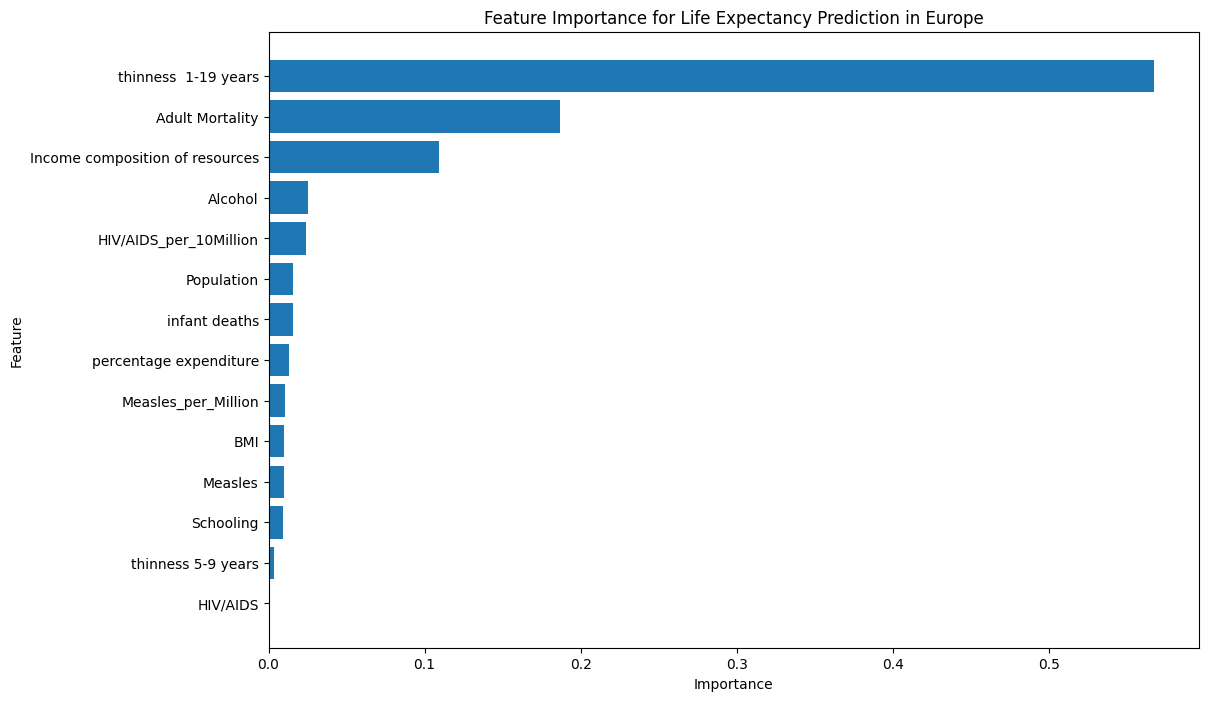

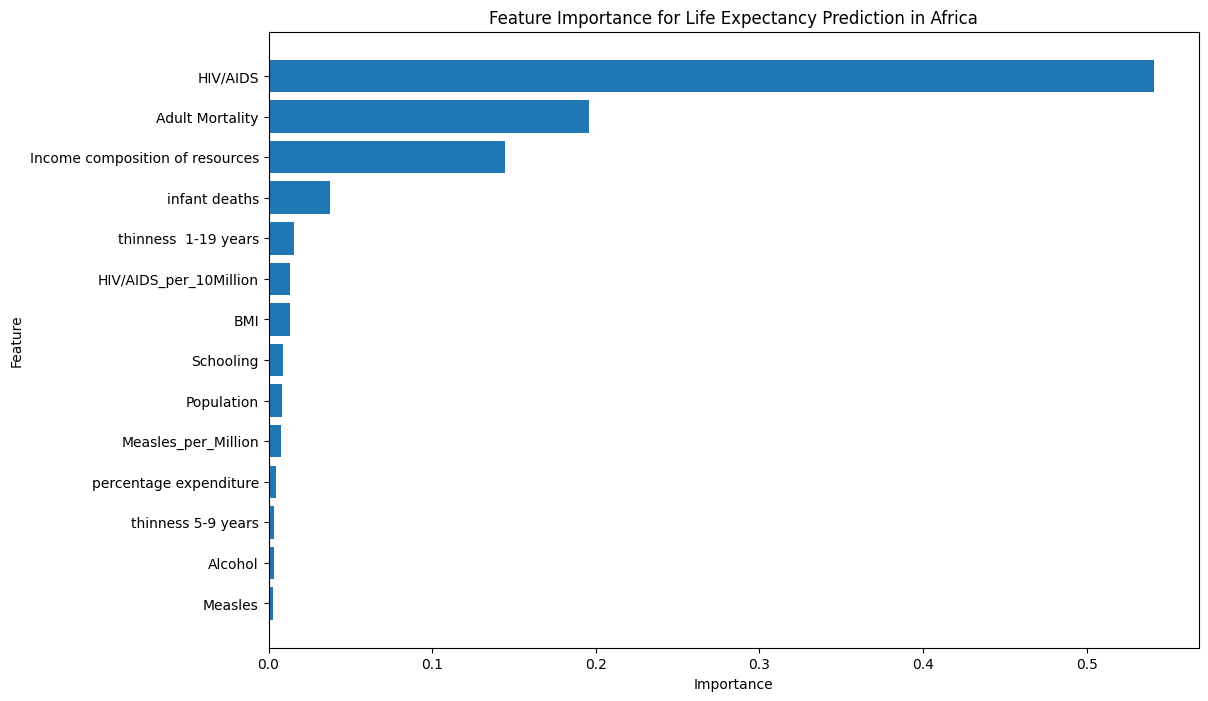

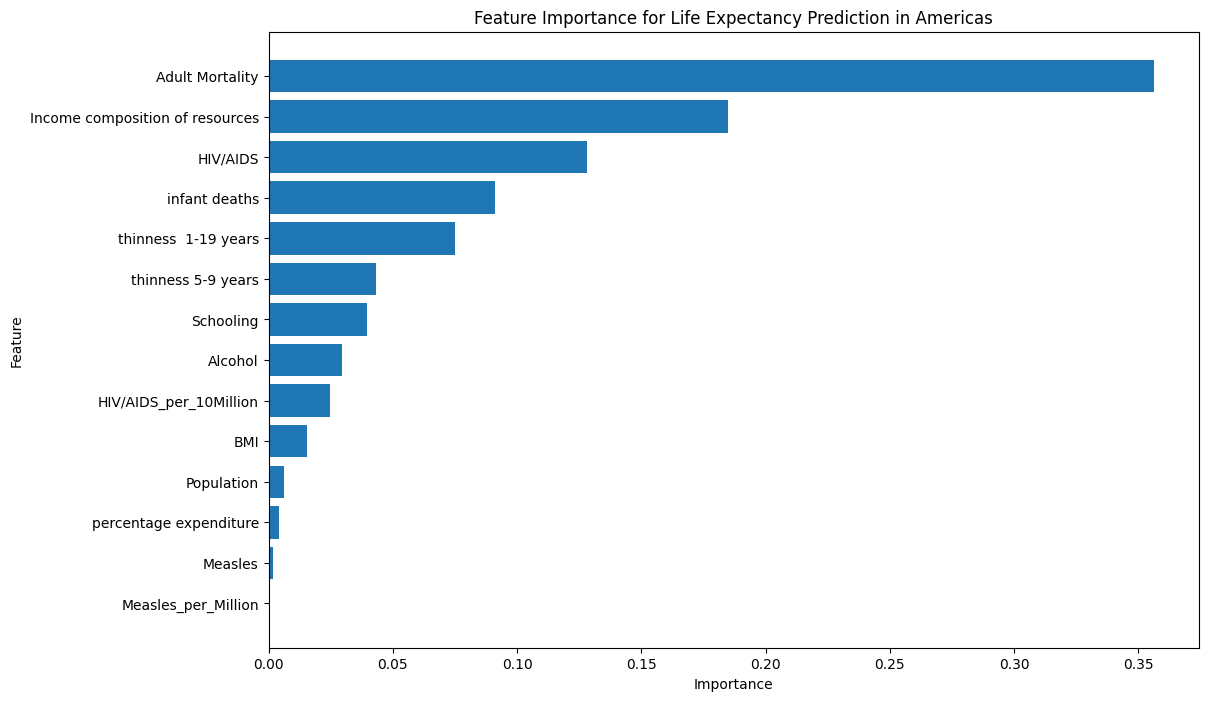

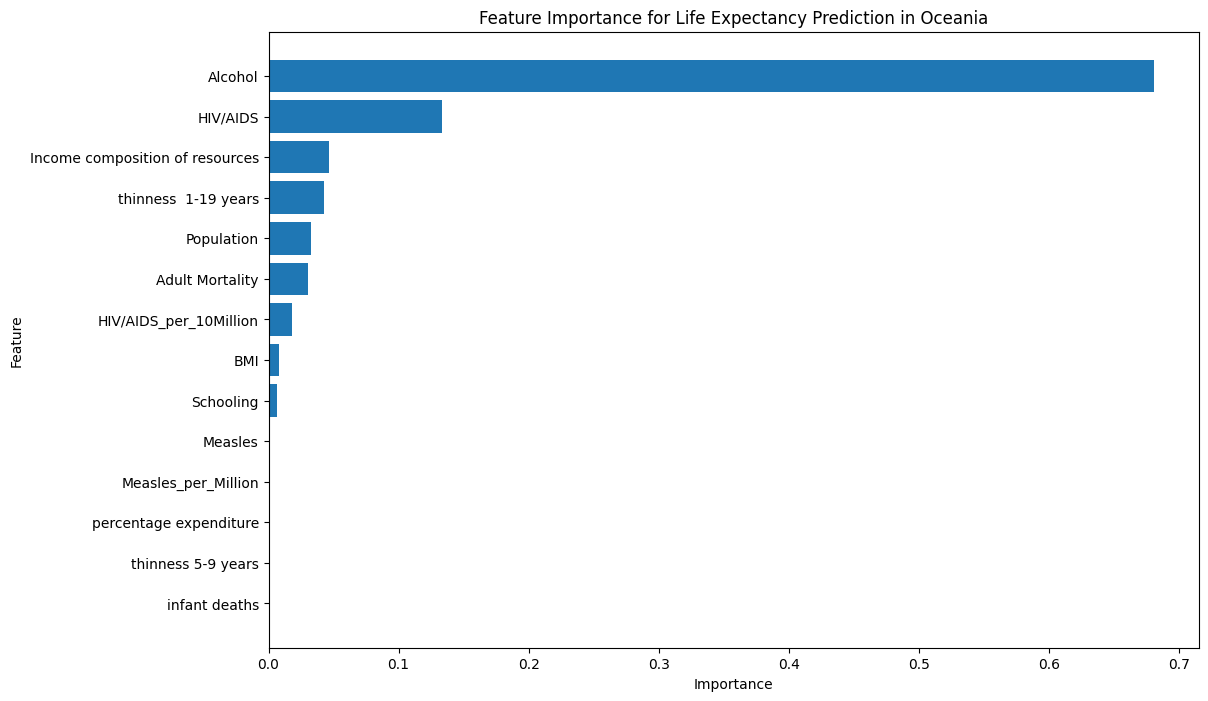

In [6]:

# Load the CSV file and preprocess the data
file_path = 'Final_Data_Set.csv'
df = pd.read_csv(file_path)

# Trim spaces from column names
df.columns = df.columns.str.strip()

# Define features and target variable
features = ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 
            'Measles', 'BMI', 'HIV/AIDS', 'thinness  1-19 years', 'thinness 5-9 years', 
            'Income composition of resources', 'Schooling', 'Population', 
            'Measles_per_Million', 'HIV/AIDS_per_10Million']
target = 'Life expectancy'

# Get unique regions
regions = df['region'].unique()

# Initialize an empty dictionary to store feature importances for each region
feature_importances_by_region = {}

# Loop through each region
for region in regions:
    # Filter data for the current region
    region_data = df[df['region'] == region]
    
    # Define X (features) and y (target) for the current region
    X = region_data[features]
    y = region_data[target]
    
    # Initialize the Decision Tree Regressor
    regressor = DecisionTreeRegressor(random_state=42)
    
    # Train the model on the current region's data
    regressor.fit(X, y)
    
    # Get feature importances
    feature_importances = regressor.feature_importances_
    
    # Create a DataFrame for feature importances
    feature_importances_df = pd.DataFrame({
        'Feature': features,
        'Importance': feature_importances
    })
    
    # Sort the DataFrame by importance
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
    
    # Store feature importances for the current region
    feature_importances_by_region[region] = feature_importances_df
    
    # Plot the feature importances for the current region
    plt.figure(figsize=(12, 8))
    plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importance for Life Expectancy Prediction in {region}')
    plt.gca().invert_yaxis()
    plt.show()


##### Breaking down the results by status

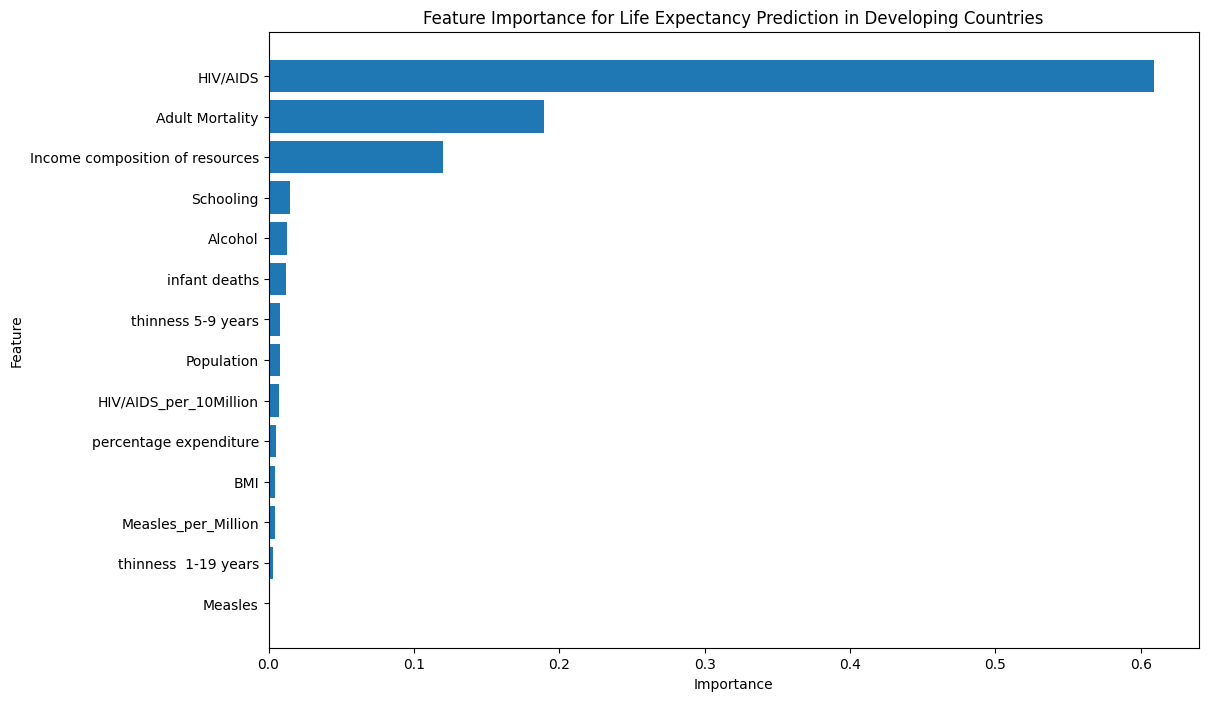

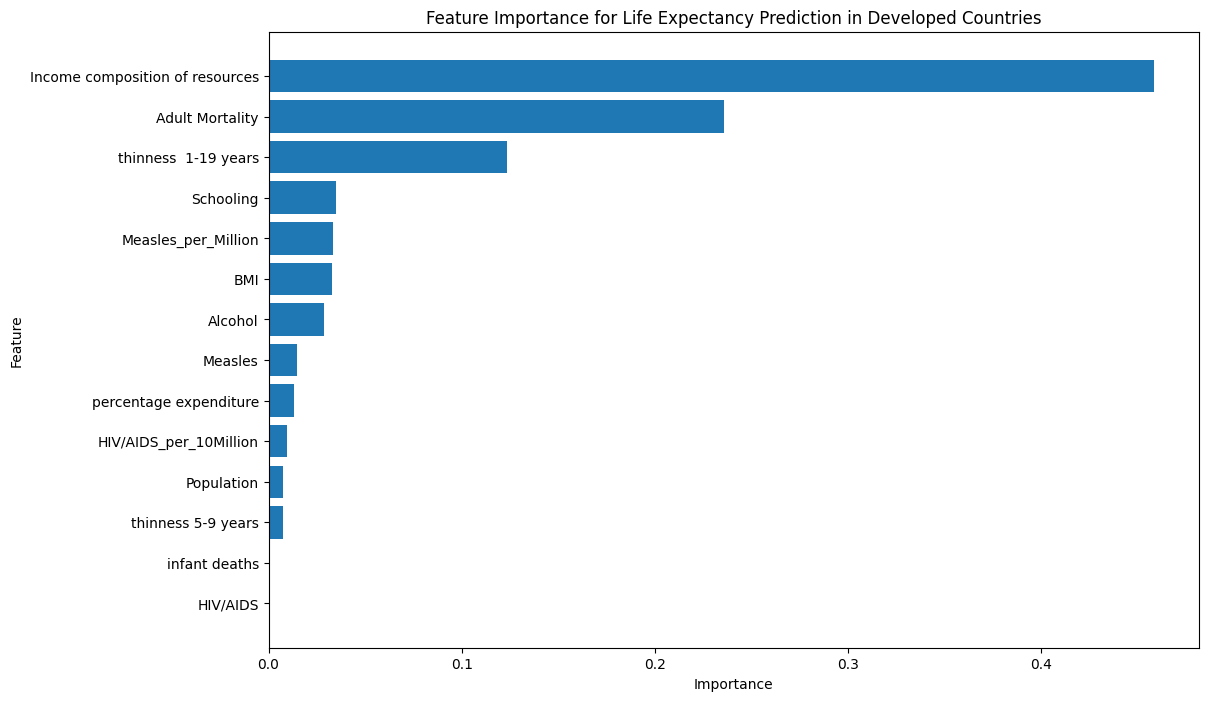

In [7]:

# Load the CSV file and preprocess the data
file_path = 'Final_Data_Set.csv'
df = pd.read_csv(file_path)

# Trim spaces from column names
df.columns = df.columns.str.strip()

# Define features and target variable
features = ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 
            'Measles', 'BMI', 'HIV/AIDS', 'thinness  1-19 years', 'thinness 5-9 years', 
            'Income composition of resources', 'Schooling', 'Population', 
            'Measles_per_Million', 'HIV/AIDS_per_10Million']
target = 'Life expectancy'

# Get unique statuses
statuses = df['Status'].unique()

# Initialize an empty dictionary to store feature importances for each status
feature_importances_by_status = {}

# Loop through each status
for status in statuses:
    # Filter data for the current status
    status_data = df[df['Status'] == status]
    
    # Define X (features) and y (target) for the current status
    X = status_data[features]
    y = status_data[target]
    
    # Initialize the Decision Tree Regressor
    regressor = DecisionTreeRegressor(random_state=42)
    
    # Train the model on the current status's data
    regressor.fit(X, y)
    
    # Get feature importances
    feature_importances = regressor.feature_importances_
    
    # Create a DataFrame for feature importances
    feature_importances_df = pd.DataFrame({
        'Feature': features,
        'Importance': feature_importances
    })
    
    # Sort the DataFrame by importance
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
    
    # Store feature importances for the current status
    feature_importances_by_status[status] = feature_importances_df
    
    # Plot the feature importances for the current status
    plt.figure(figsize=(12, 8))
    plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importance for Life Expectancy Prediction in {status} Countries')
    plt.gca().invert_yaxis()
    plt.show()


#### 4. Visually analyzing the results

In [8]:
# Predict on the training data
y_train_pred = regressor.predict(X_train)

# Calculate performance metrics for the training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = regressor.predict(X_test)

# Calculate performance metrics for the testing data
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the performance metrics
print(f'Training Mean Squared Error: {train_mse:.2f}')
print(f'Training R-squared: {train_r2:.2f}')
print(f'Testing Mean Squared Error: {test_mse:.2f}')
print(f'Testing R-squared: {test_r2:.2f}')

# Check if the model is overfitting
if train_r2 > test_r2:
    print("The model might be overfitting.")
else:
    print("The model does not seem to be overfitting.")

Training Mean Squared Error: 84.73
Training R-squared: 0.08
Testing Mean Squared Error: 78.48
Testing R-squared: 0.09
The model does not seem to be overfitting.


##### Creating a heat map to better visualize the results

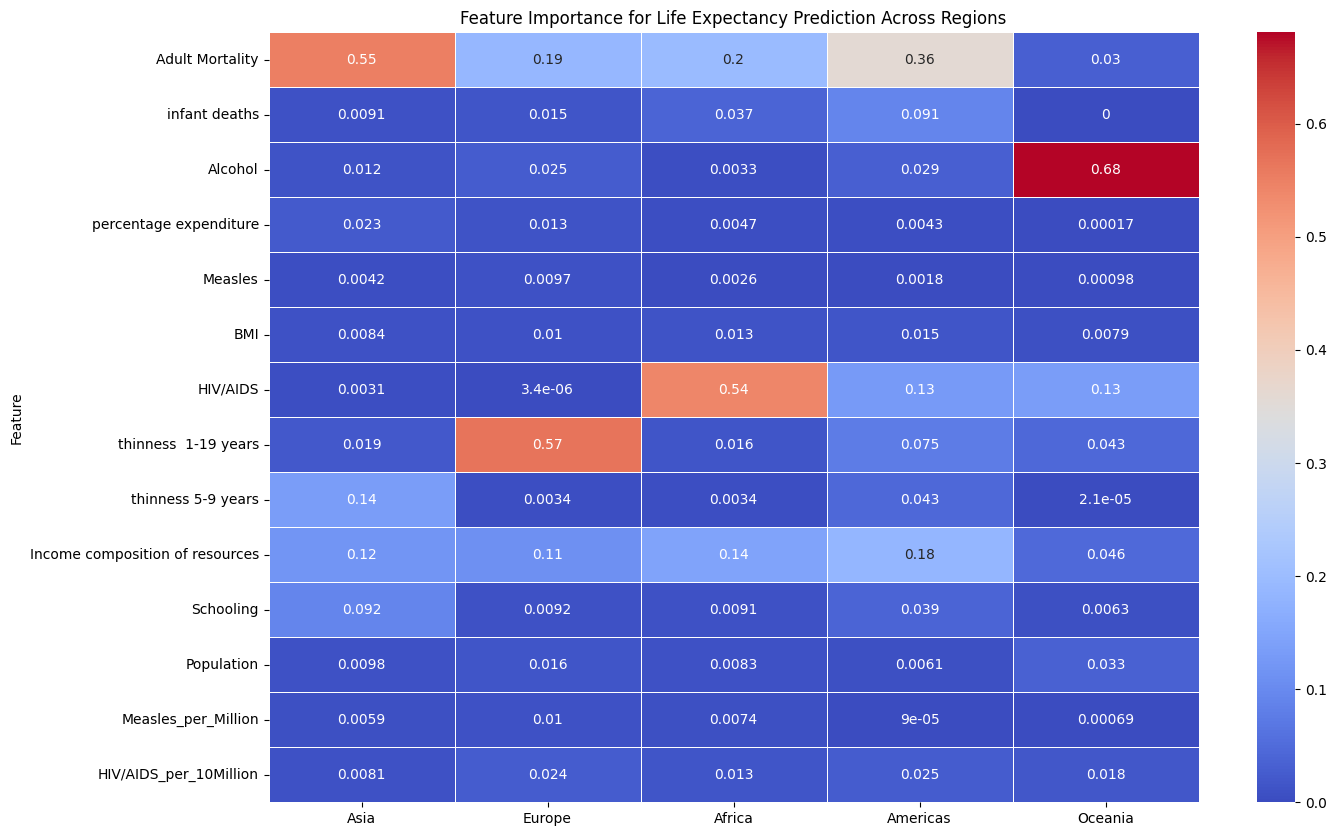

In [9]:
# Load the CSV file and preprocess the data
file_path = 'Final_Data_Set.csv'
df = pd.read_csv(file_path)

# Trim spaces from column names
df.columns = df.columns.str.strip()

# Define features and target variable
features = ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 
            'Measles', 'BMI', 'HIV/AIDS', 'thinness  1-19 years', 'thinness 5-9 years', 
            'Income composition of resources', 'Schooling', 'Population', 
            'Measles_per_Million', 'HIV/AIDS_per_10Million']
target = 'Life expectancy'

# Get unique regions
regions = df['region'].unique()

# Initialize an empty DataFrame to store feature importances for each region
feature_importances_df = pd.DataFrame()

# Loop through each region
for region in regions:
    # Filter data for the current region
    region_data = df[df['region'] == region]
    
    # Define X (features) and y (target) for the current region
    X = region_data[features]
    y = region_data[target]
    
    # Initialize the Decision Tree Regressor
    regressor = DecisionTreeRegressor(random_state=42)
    
    # Train the model on the current region's data
    regressor.fit(X, y)
    
    # Get feature importances
    feature_importances = regressor.feature_importances_
    
    # Create a DataFrame for feature importances
    temp_df = pd.DataFrame({
        'Feature': features,
        region: feature_importances
    })
    
    # Merge with the main DataFrame
    if feature_importances_df.empty:
        feature_importances_df = temp_df
    else:
        feature_importances_df = feature_importances_df.merge(temp_df, on='Feature')

# Set the 'Feature' column as the index
feature_importances_df.set_index('Feature', inplace=True)

# Plot the heatmap of feature importances across regions
plt.figure(figsize=(15, 10))
sns.heatmap(feature_importances_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Importance for Life Expectancy Prediction Across Regions')
plt.show()


##### Creating a Random Forest Regressor for comparative analysis

Mean Squared Error: 2.76
R-squared: 0.97

Feature Importances:
                            Feature  Importance
9   Income composition of resources    0.525474
6                          HIV/AIDS    0.294030
0                   Adult Mortality    0.107452
5                               BMI    0.010569
2                           Alcohol    0.009316
10                        Schooling    0.009168
8                thinness 5-9 years    0.008242
1                     infant deaths    0.008156
7              thinness  1-19 years    0.006188
13           HIV/AIDS_per_10Million    0.005552
11                       Population    0.005319
3            percentage expenditure    0.004318
12              Measles_per_Million    0.003668
4                           Measles    0.002548


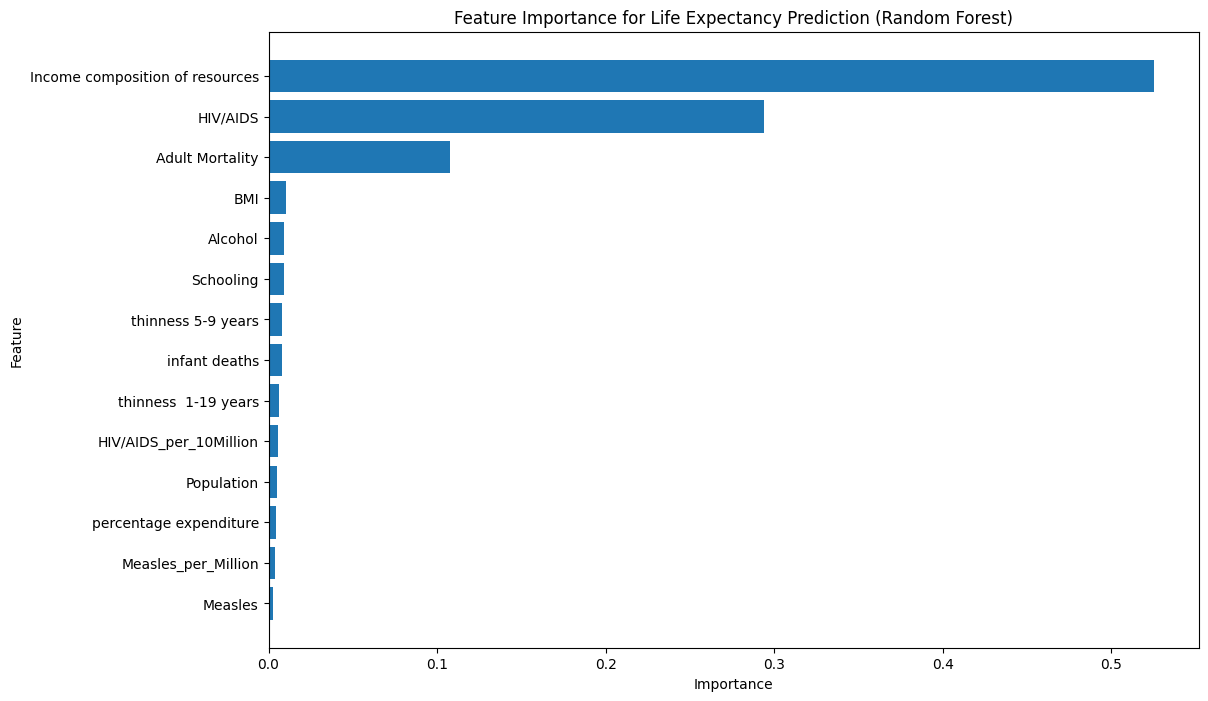

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Load the CSV file and preprocess the data
file_path = 'Final_Data_Set.csv'
df = pd.read_csv(file_path)

# Trim spaces from column names
df.columns = df.columns.str.strip()

# Define features and target variable
features = ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 
            'Measles', 'BMI', 'HIV/AIDS', 'thinness  1-19 years', 'thinness 5-9 years', 
            'Income composition of resources', 'Schooling', 'Population', 
            'Measles_per_Million', 'HIV/AIDS_per_10Million']
target = 'Life expectancy'

# Define X (features) and y (target)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = regressor.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Get feature importances
feature_importances = regressor.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("\nFeature Importances:")
print(feature_importances_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Life Expectancy Prediction (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

##### Creating a Gradient Boosting Regressor for comparative analysis

Mean Squared Error: 4.15
R-squared: 0.95

Feature Importances:
                            Feature  Importance
9   Income composition of resources    0.522178
6                          HIV/AIDS    0.289541
0                   Adult Mortality    0.117344
1                     infant deaths    0.023969
10                        Schooling    0.013771
8                thinness 5-9 years    0.012221
13           HIV/AIDS_per_10Million    0.005366
11                       Population    0.004534
2                           Alcohol    0.003302
12              Measles_per_Million    0.002681
7              thinness  1-19 years    0.002027
5                               BMI    0.001778
3            percentage expenditure    0.001223
4                           Measles    0.000064


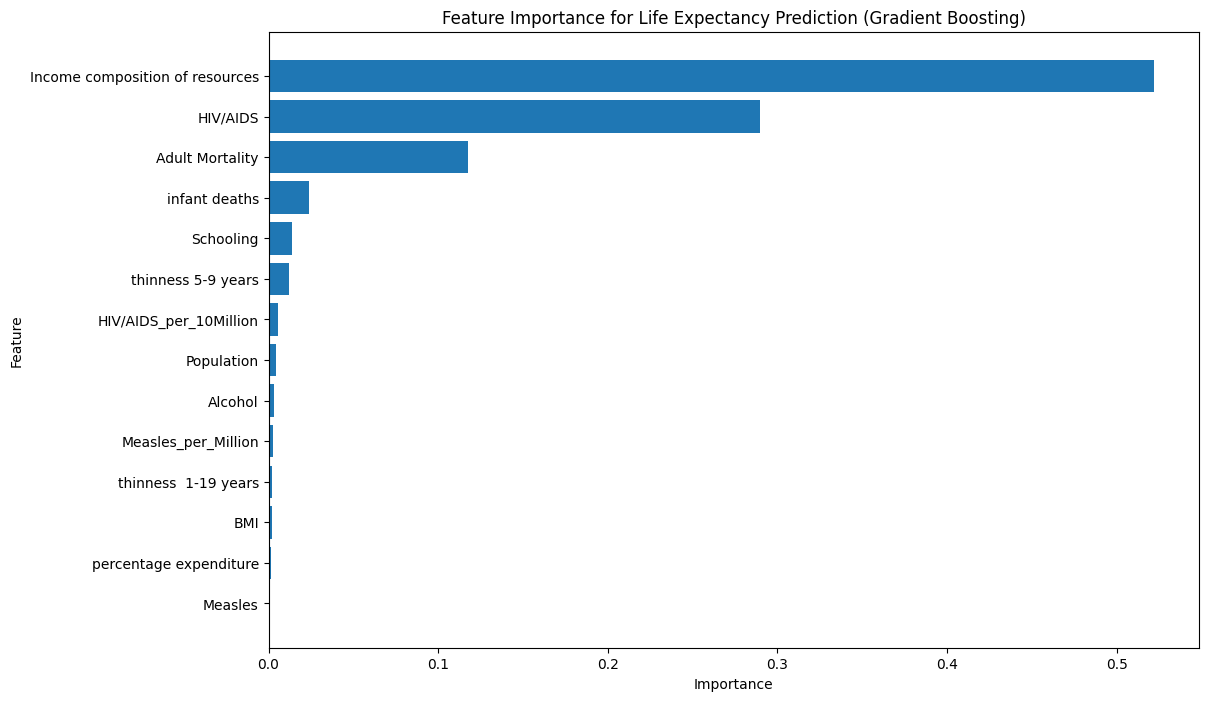

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
# Load the CSV file and preprocess the data
file_path = 'Final_Data_Set.csv'
df = pd.read_csv(file_path)

# Trim spaces from column names
df.columns = df.columns.str.strip()

# Define features and target variable
features = ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 
            'Measles', 'BMI', 'HIV/AIDS', 'thinness  1-19 years', 'thinness 5-9 years', 
            'Income composition of resources', 'Schooling', 'Population', 
            'Measles_per_Million', 'HIV/AIDS_per_10Million']
target = 'Life expectancy'

# Define X (features) and y (target)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = regressor.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Get feature importances
feature_importances = regressor.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("\nFeature Importances:")
print(feature_importances_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Life Expectancy Prediction (Gradient Boosting)')
plt.gca().invert_yaxis()
plt.show()

##### Analysis of the comparison

| Model                   | Mean Squared Error (MSE) | R-squared (R²) |
|-------------------------|--------------------------|----------------|
| DecisionTreeRegressor   | 6.60                     | 0.92           |
| RandomForestRegressor   | 2.76                     | 0.97           |
| GradientBoostingRegressor | 4.15                     | 0.95           |


The Random Forest Regressor had the lowest MSE score which means stastistly speaking it should make the lowest amount of errors based on the data set we currently have. The R2 is also the lowest for the Random Forest Regressor which means that it has the best fit for accruate predictions. The Gradient Boosting Regressor it in the middle in both metrics and is clearly the second most viable choice with the Decision Tree comming in as a distant third but it's metrics are still acceptable. 
